In [1]:
import torch
import numpy as np
from torch import Tensor
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision
%matplotlib inline

## 1. initialize tensor, basic operations, convert to numpy


In [2]:
x = torch.rand(5, 3)

In [3]:
x

tensor([[0.9902, 0.3784, 0.4563],
        [0.8189, 0.5087, 0.2188],
        [0.6178, 0.6991, 0.8038],
        [0.6800, 0.9577, 0.7683],
        [0.7091, 0.8719, 0.5952]])

In [4]:
x.long()


tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [5]:
x = x.long()
x.dtype

torch.int64

## 2. automatic differentiation

In [6]:
x = Tensor([2])
x.requires_grad = True
loss = x**2
loss.backward()

In [7]:
x.grad

tensor([4.])

### 2.1 simple manual gradient descent

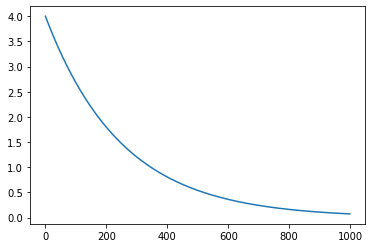

tensor([0.2701], requires_grad=True)
0.07296964526176453


In [8]:
x = Tensor([2])
x.requires_grad = True
alpha = 0.001 # is the learning rate
n_updates = 1000
x_axis_num_of_update = np.arange(n_updates)
loss_values_through_training = np.zeros(n_updates)
for i in range(n_updates): # the nubmer of updates
    x.grad = None # set gradient to zero, so that they do not accumulate
    loss = x**2 # compute the loss
    loss.backward() # do backprop
    # do gradient descent Note here we minus the gradient, instead of add to it
    x.data -= alpha * x.grad.data 
    loss_values_through_training[i] = loss.item()
    
plt.plot(x_axis_num_of_update,loss_values_through_training)
plt.show()
print(x)
loss = x**2 # compute the loss
print(loss.item())

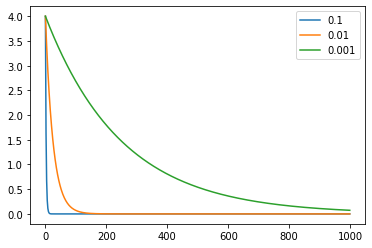

In [9]:
def train(alpha):
    x = Tensor([2])
    x.requires_grad = True
    n_updates = 1000
    x_axis_num_of_update = np.arange(n_updates)
    loss_values_through_training = np.zeros(n_updates)
    for i in range(n_updates): # the nubmer of updates
        x.grad = None # set gradient to zero, so that they do not accumulate
        loss = x**2 # compute the loss
        loss.backward() # do backprop
        # do gradient descent Note here we minus the gradient, instead of add to it
        x.data -= alpha * x.grad.data 
        loss_values_through_training[i] = loss.item()
    return loss_values_through_training
    
for alpha in [0.1, 0.01, 0.001]:
    values = train(alpha)
    plt.plot(x_axis_num_of_update,values, label=alpha)
plt.legend()
plt.show()

## 3. Neural net

### 3.1 super simple linear model
yhat = x1\*w1 + x2\*w2 + b  
loss = (y-yhat)^2   

In [10]:
X = Tensor([1,2]).reshape(-1, 2)
y = Tensor([6])

In [11]:
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(2, 1)  # 6*6 from image dimension
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = self.fc1(x)
        return x

In [12]:
net1 = Net1()

In [13]:
print(net1.fc1.weight.shape, net1.fc1.bias.shape)

torch.Size([1, 2]) torch.Size([1])


In [14]:
# set the weights and the bias for our little testing
net1.fc1.weight.data[0,0] = 2
net1.fc1.weight.data[0,1] = 3
net1.fc1.bias.data[0] = 0

In [15]:
yhat = net1(X)
yhat

tensor([[8.]], grad_fn=<AddmmBackward>)

In [16]:
loss = (yhat - y)**2/1
loss

tensor([[4.]], grad_fn=<DivBackward0>)

In [17]:
loss.backward()

In [18]:
X, y, yhat, net1.fc1.weight.data, net1.fc1.bias.data

(tensor([[1., 2.]]),
 tensor([6.]),
 tensor([[8.]], grad_fn=<AddmmBackward>),
 tensor([[2., 3.]]),
 tensor([0.]))

What should the gradient be?   
dloss/dw1 = dloss/dyhat \* dyhat/dw1 = ?   
dloss/dw2 = dloss/dyhat \* dyhat/dw1 = ?   
dloss/db = dloss/dyhat \* dyhat/db = ?   

In [19]:
X.grad

In [20]:
net1.fc1.weight.grad

tensor([[4., 8.]])

In [21]:
net1.fc1.bias.grad

tensor([4.])

dloss/dw1 = dloss/dyhat \* dyhat/dw1 = 2(2) \* 1 = 4   
dloss/dw2 = dloss/dyhat \* dyhat/dw1 = 2(2) \* 2 = 8   
dloss/db = dloss/dyhat \* dyhat/db = 2(2) \* 1 = 4  

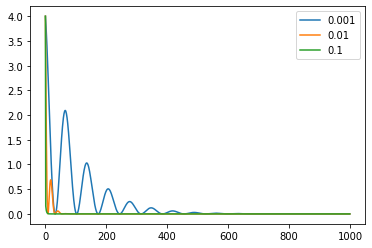

In [22]:
def train_net1(alpha):
    net1 = Net1()
    # set the weights and the bias for our little testing
    net1.fc1.weight.data[0,0] = 2
    net1.fc1.weight.data[0,1] = 3
    net1.fc1.bias.data[0] = 0
    n_updates = 1000
    x_axis_num_of_update = np.arange(n_updates)
    loss_values_through_training = np.zeros(n_updates)
    for i in range(n_updates): # the nubmer of updates
        yhat = net1(X)
        # compute loss
        loss = (yhat - y)**2/1
        # zero out the gradient
        net1.fc1.weight.grad = None
        net1.fc1.bias.bias = None
        # backprop
        loss.backward()
        # do gradient descent
        net1.fc1.weight.data -= alpha * net1.fc1.weight.grad
        net1.fc1.bias.data -= alpha * net1.fc1.bias.grad
        loss_values_through_training[i] = loss.item()
    return x_axis_num_of_update, loss_values_through_training
for alpha in [0.001, 0.01, 0.1]:
    x_axis_num_of_update, values = train_net1(alpha)
    plt.plot(x_axis_num_of_update,values, label=alpha)
plt.legend()
plt.show()
    